In [1]:
data_path = '/Users/apple/Desktop/Machine_Learning/project/Audio/data_audi/data_prepared'

In [2]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn import cross_validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split



/Users/apple/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [68]:
data = pd.read_csv(data_path+'/sample_selected.csv',index_col = 0)

# Feature Analysis

In [4]:
data.columns

Index(['name', 'vowel', 'stress', 'pre_word', 'word', 'fol_word', 'F1', 'F2',
       'F3', 'B1', 'B2', 'B3', 't', 'beg', 'end', 'dur', 'plt_vclass',
       'plt_manner', 'plt_place', 'plt_voice', 'plt_preseg', 'plt_folseq',
       'style', 'glide', 'pre_seg', 'fol_seg', 'context', 'vowel_index',
       'pre_word_trans', 'word_trans', 'fol_word_trans', 'F1@20%', 'F2@20%',
       'F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%',
       'F2@80%', 'nFormants', 'Speaker', 'Democratic', 'Republican', 'label'],
      dtype='object')

In [7]:
% matplotlib inline

In [12]:
data.stress.unique()

array([1, 0, 2])

# Vowel Level Model

In [16]:
import seaborn as sns

In [24]:
vowel_count = pd.DataFrame(data.groupby(['label','vowel'])['vowel'].count())
vowel_count['Party'] = list(map(lambda x: 'Democrat' if x==1 else 'Republic',vowel_count.index.get_level_values('label')))
vowel_count['Vowel'] = list(vowel_count.index.get_level_values('vowel'))

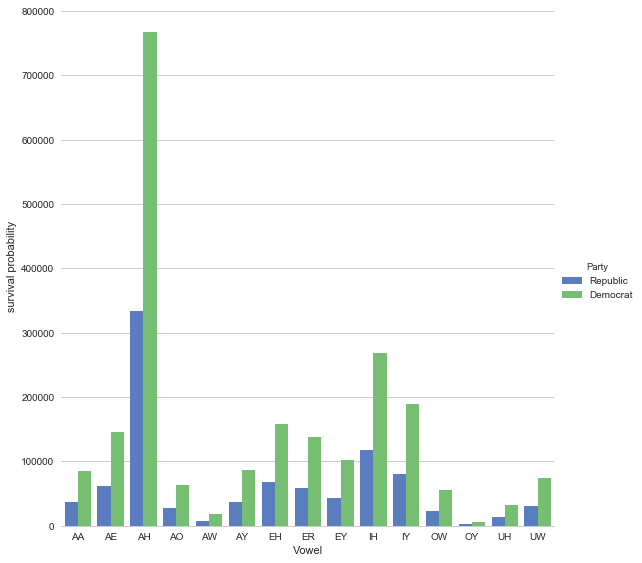

In [28]:

sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="Vowel", y="vowel", hue="Party", data=vowel_count,
                   size=8, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

In [59]:
def distribution_vowel_figure(vowel, data):
    data_AA = data[data['vowel']==vowel][['label','vowel', 'stress', 'dur',
                          'F1', 'F2','F3', 'B1', 'B2', 'B3']]
    data_figure = pd.DataFrame(list(data_AA['label'])*6,columns=['label'])
    value = list(data_AA['F1'])+list(data_AA['F2'])+list(data_AA['F3'])+list(data_AA['B1'])+list(data_AA['B2'])+list(data_AA['B3'])
    data_figure['value'] = value
    data_figure['feature'] = ['F1']*len(data_AA)+['F2']*len(data_AA)+['F3']*len(data_AA)+['B1']*len(data_AA)+['B2']*len(data_AA)+['B3']*len(data_AA)
    sns.set(style="whitegrid", palette="pastel", color_codes=True)

    # Load the example tips dataset
    #tips = sns.load_dataset("tips")
    plt.figure(figsize=(15, 10))
    # Draw a nested violinplot and split the violins for easier comparison
    sns.violinplot(x="feature", y="value", hue="label", data=data_figure, split=True,
               inner="quart", palette={1: "b", -1: "y"},size=10)
    sns.despine(left=True)
    plt.title('Important feature distribution of vowel'+vowel)

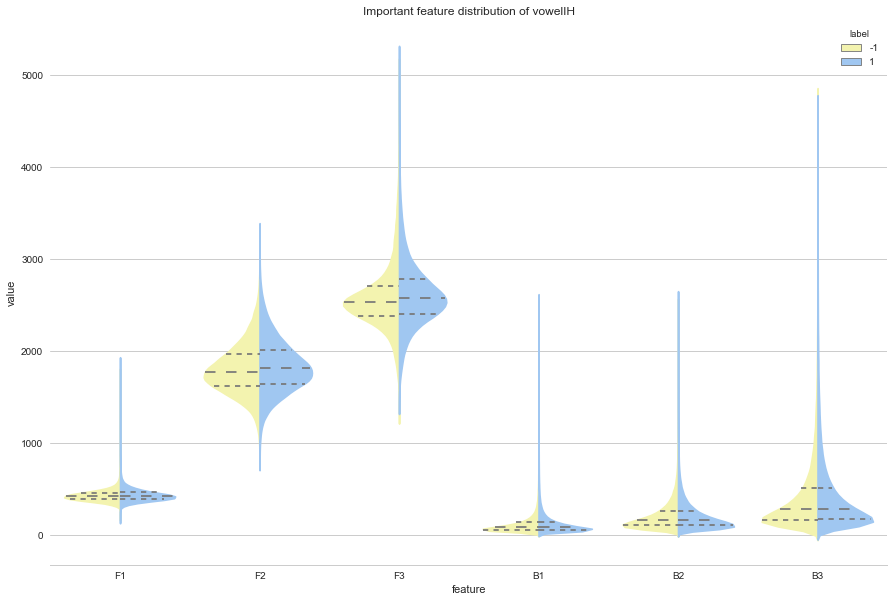

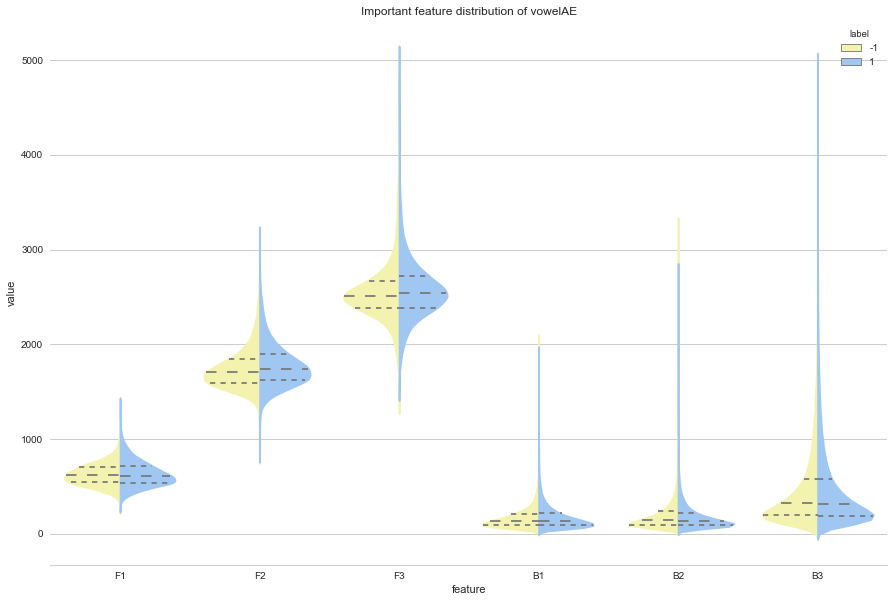

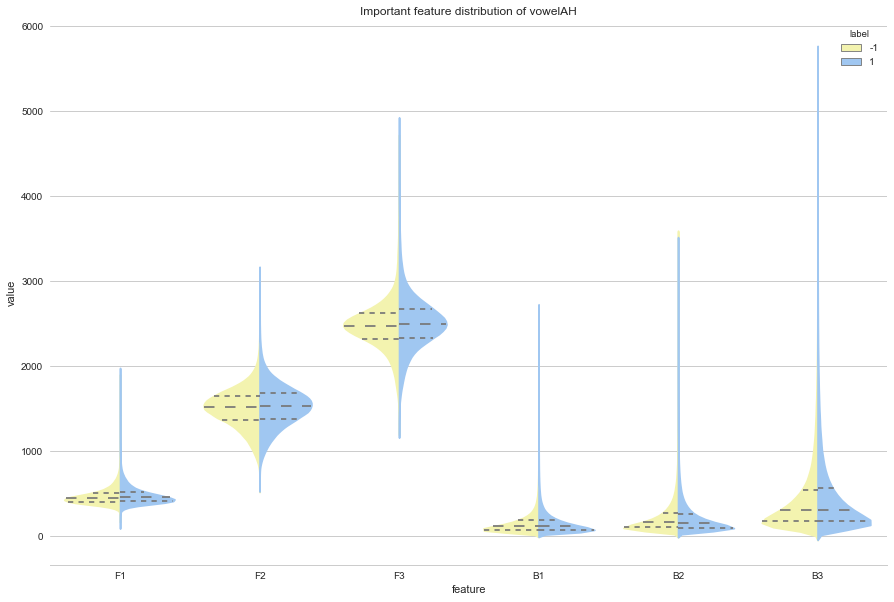

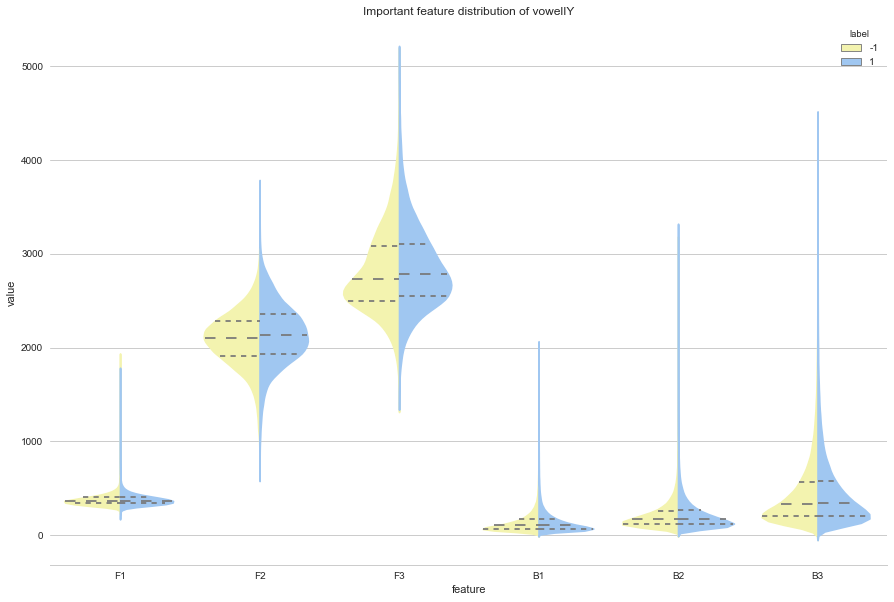

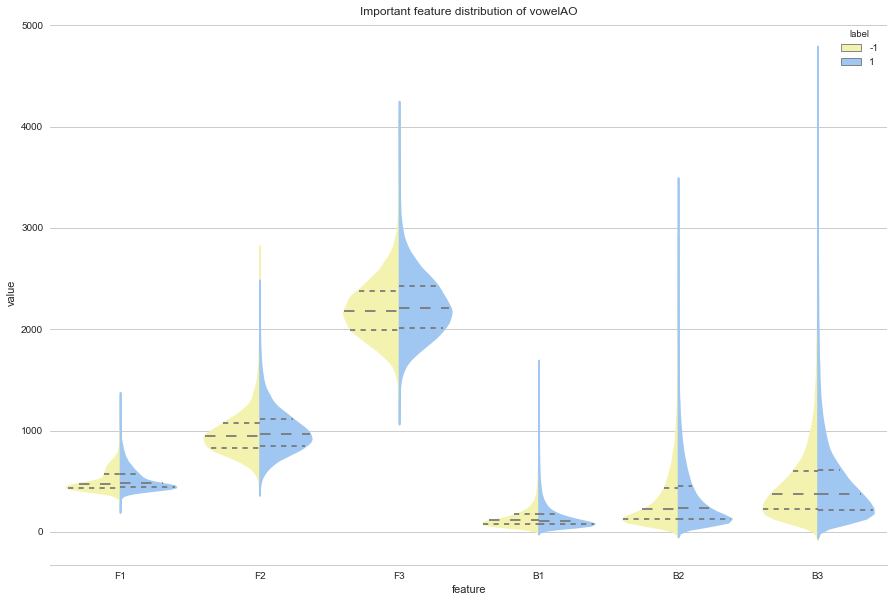

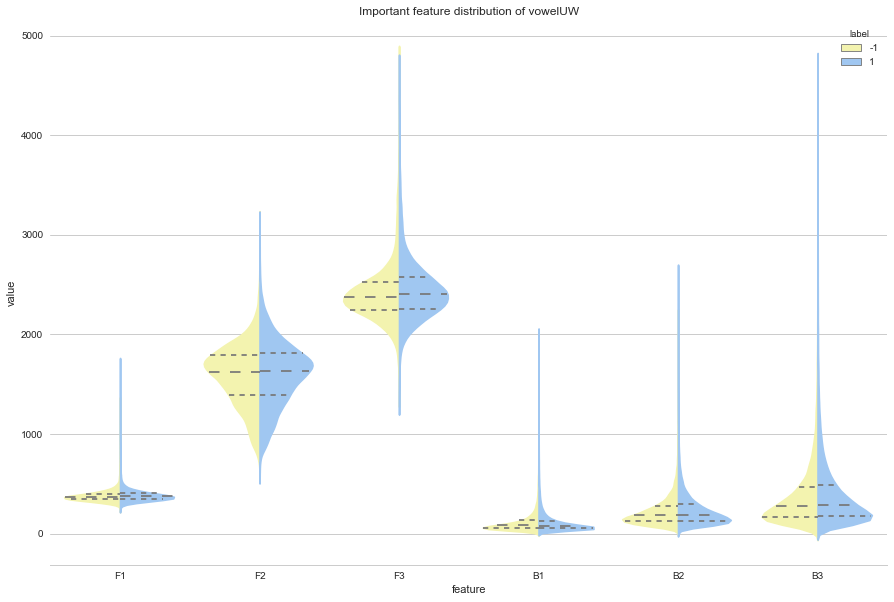

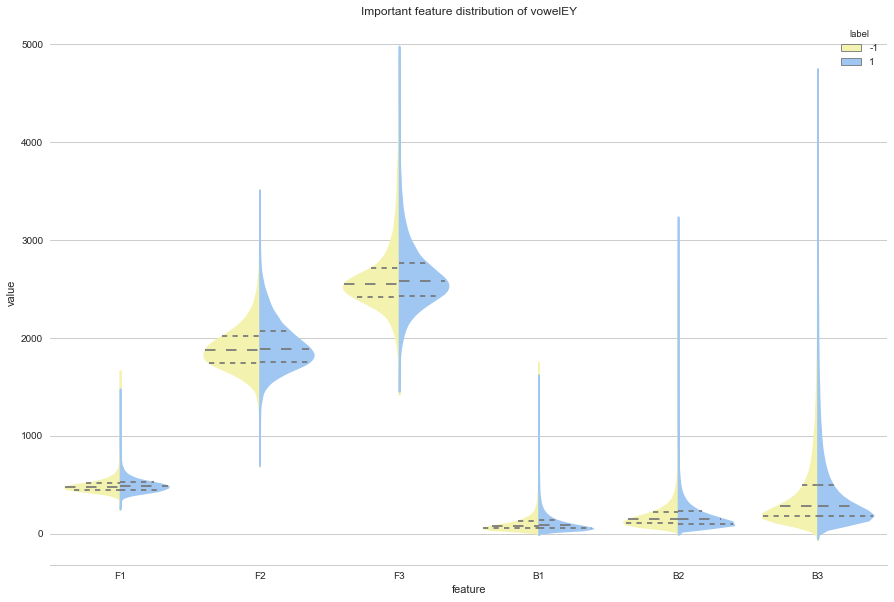

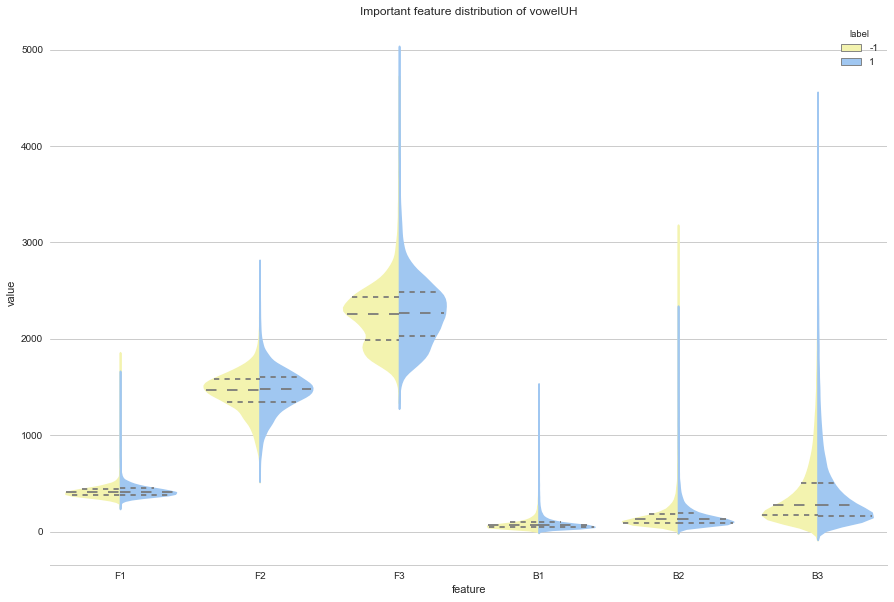

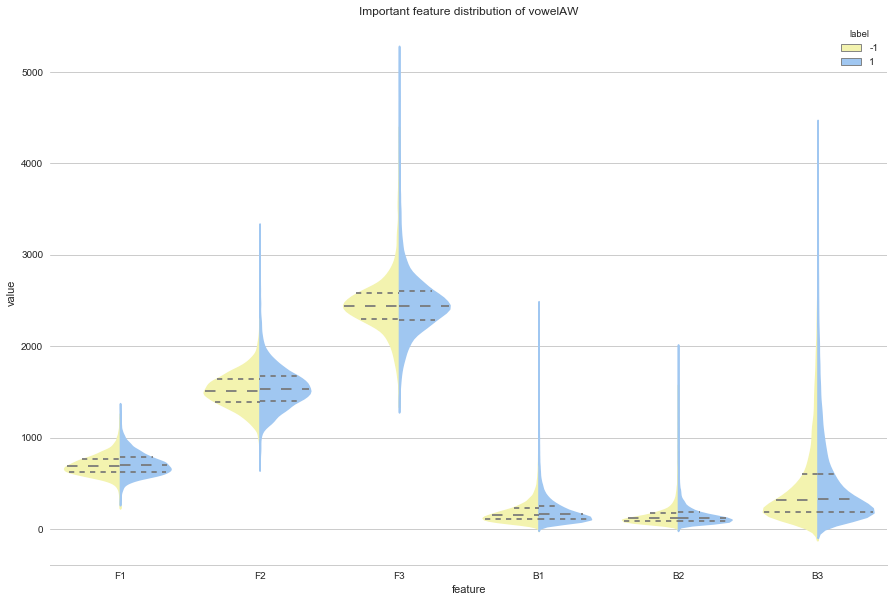

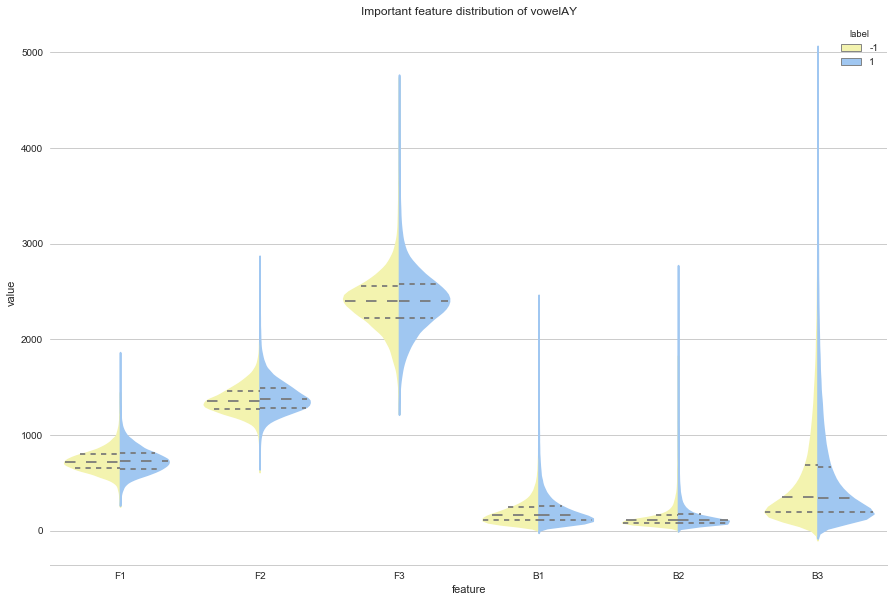

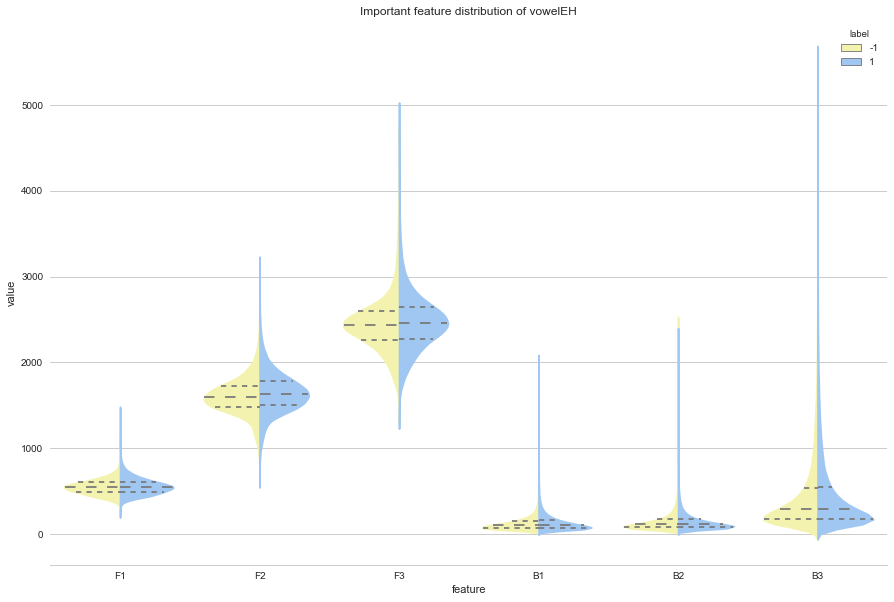

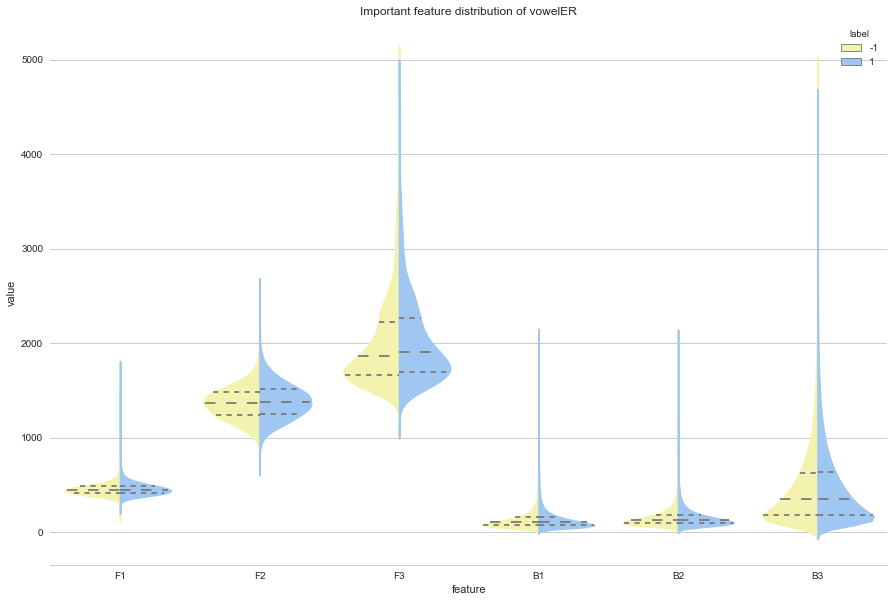

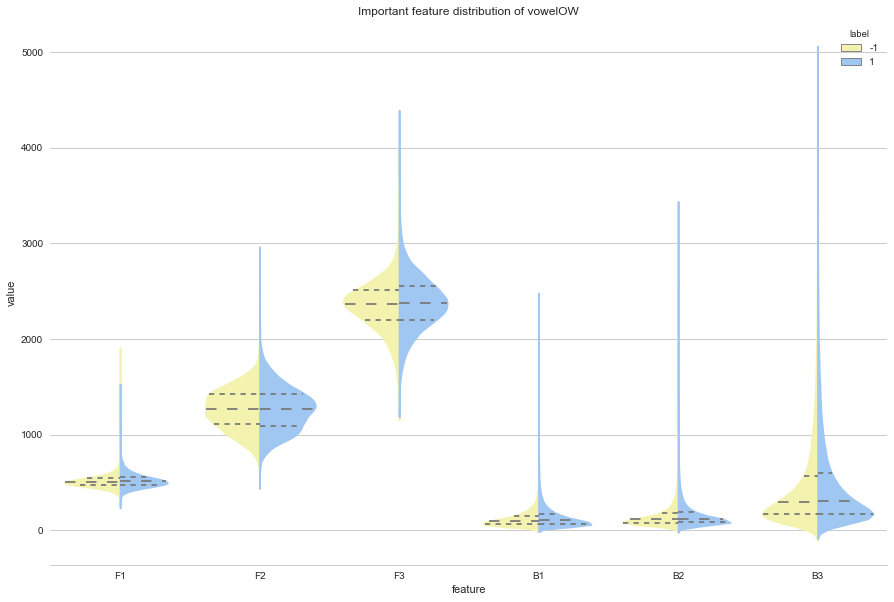

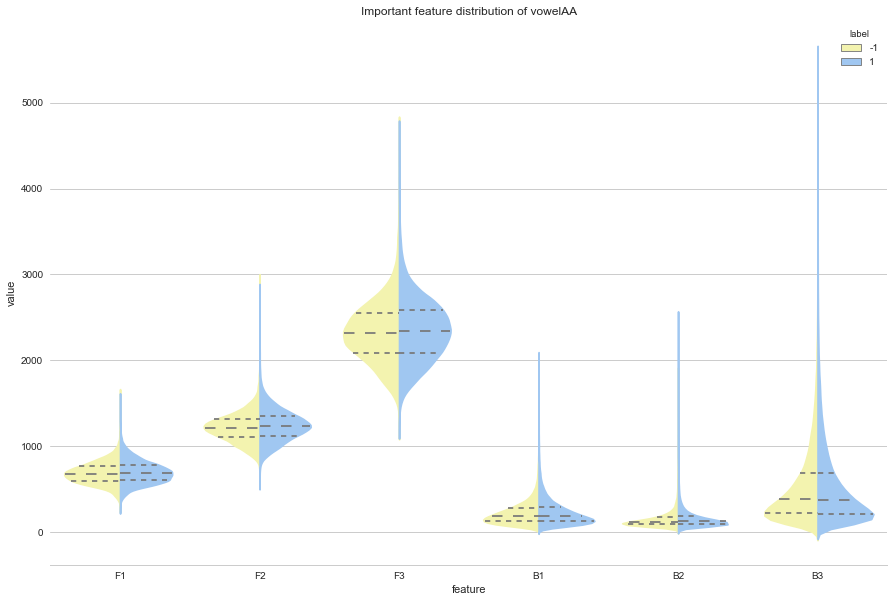

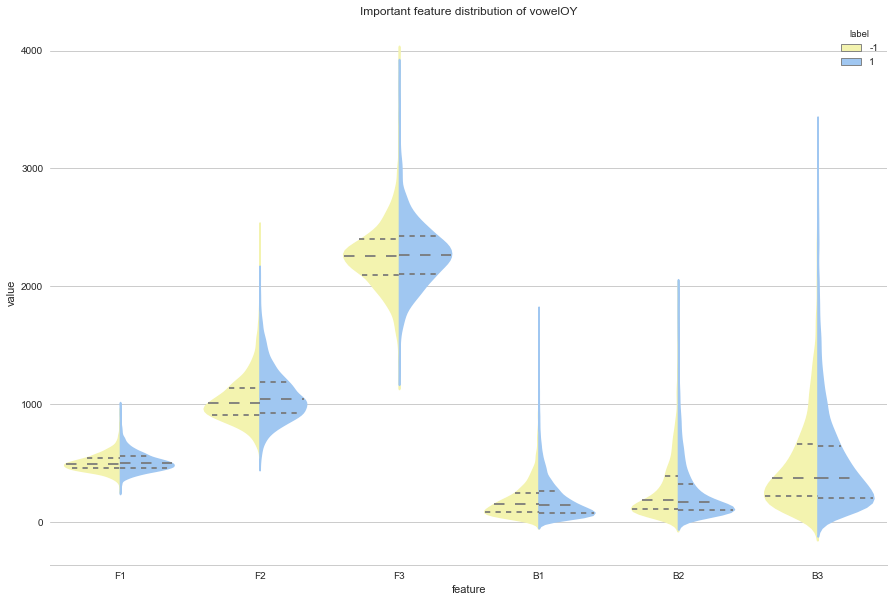

In [60]:
for vowel in data.vowel.unique():
    distribution_vowel_figure(vowel,data)

In [65]:
from scipy import stats
np.random.seed(12345678)
def ttest_main_feature(vowel,data):
    data_p = data[data['vowel']==vowel][data['label']==1][['stress', 'dur',
                          'F1', 'F2','F3', 'B1', 'B2', 'B3']]#,'F1@20%', 'F2@20%','F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%','F2@80%','nFormants']]
    data_n = data[data['vowel']==vowel][data['label']==-1][['stress', 'dur',
                          'F1', 'F2','F3', 'B1', 'B2', 'B3']]#,'F1@20%', 'F2@20%','F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%','F2@80%','nFormants']]
    print(stats.ttest_ind(data_p, data_n))

In [74]:
vowel = 'AA'
data_p = data_fill[data_fill['vowel']==vowel][data_fill['label']==1][['stress', 'dur',
                          'F1', 'F2','F3', 'B1', 'B2', 'B3']]#,'F1@20%', 'F2@20%','F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%','F2@80%','nFormants']]
data_n = data_fill[data_fill['vowel']==vowel][data_fill['label']==-1][['stress', 'dur',
                          'F1', 'F2','F3', 'B1', 'B2', 'B3']]#,'F1@20%', 'F2@20%','F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%','F2@80%','nFormants']]
stats.ttest_ind(data_p, data_n)

/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Ttest_indResult(statistic=array([ -4.19016612,   7.36659791,  11.95723652,  22.66217672,
         9.0038219 ,   8.28101687,  14.09154869,  -1.11787084]), pvalue=array([  2.78946124e-005,   1.76135502e-013,   6.20897413e-033,
         1.81790742e-113,   2.21021295e-019,   1.23344541e-016,
         4.64433342e-045,   2.63624361e-001]))

In [73]:
data_fill = data.fillna(method ='backfill')
for vowel in data_fill.vowel.unique():
    ttest_main_feature(vowel,data_fill)

/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Ttest_indResult(statistic=array([  2.09467112,  17.61977419,  20.19927834,  34.11501114,
        25.15047303,  12.25442664,  -3.55723305,   6.18501249]), pvalue=array([  3.62008892e-002,   1.84971757e-069,   1.10716553e-090,
         1.06357520e-254,   1.81126465e-139,   1.61445265e-034,
         3.74826580e-004,   6.21595767e-010]))
Ttest_indResult(statistic=array([ -2.04576937,  11.56726154,  10.35200777,  30.38547853,
        11.47681165,   9.26120101, -20.39167906,  -2.86136938]), pvalue=array([  4.07803182e-002,   6.17075228e-031,   4.15582625e-025,
         2.37100459e-202,   1.76203785e-030,   2.03976378e-020,
         2.44032648e-092,   4.21857191e-003]))
Ttest_indResult(statistic=array([ 12.88117432,  26.3372738 ,  39.78905033,  48.09778345,
        43.85714597,  13.68275241, -11.48111323,  16.51863158]), pvalue=array([  5.78187053e-038,   8.00983605e-153,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   1.29764177e-042,
         1.64810927e-030,   2.74062473e

In [96]:
data_AH = data[data['vowel']=='AH'][['Speaker','word','label','vowel', 'stress', 'dur','pre_seg','fol_seg',
                          'F1', 'F2','F3', 'B1', 'B2', 'B3','F1@20%', 'F2@20%','F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%','F2@80%','nFormants']]
# test vowel by word model 
feature_V1 = data_AH
feature_V1 = feature_V1.dropna()
from sklearn import preprocessing
vowel_encoder = preprocessing.LabelEncoder()
vowel_encoder.fit(feature_V1.vowel)
feature_V1['vowel_num'] = vowel_encoder.transform(feature_V1.vowel) 

word_encoder = preprocessing.LabelEncoder()
word_encoder.fit(feature_V1.word)
feature_V1['word_num'] = word_encoder.transform(feature_V1.word) 


pre_seg_encoder = preprocessing.LabelEncoder()
pre_seg_encoder.fit(feature_V1.pre_seg)
feature_V1['pre_seg_num'] = pre_seg_encoder.transform(feature_V1.pre_seg) 

fol_seg_encoder = preprocessing.LabelEncoder()
fol_seg_encoder.fit(feature_V1.fol_seg)
feature_V1['fol_seg_num'] = fol_seg_encoder.transform(feature_V1.fol_seg)

feature_V1.index = feature_V1['Speaker']
label_speaker = feature_V1.groupby(['Speaker'])['label'].mean()
speaker = np.array(list(label_speaker.index))


/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

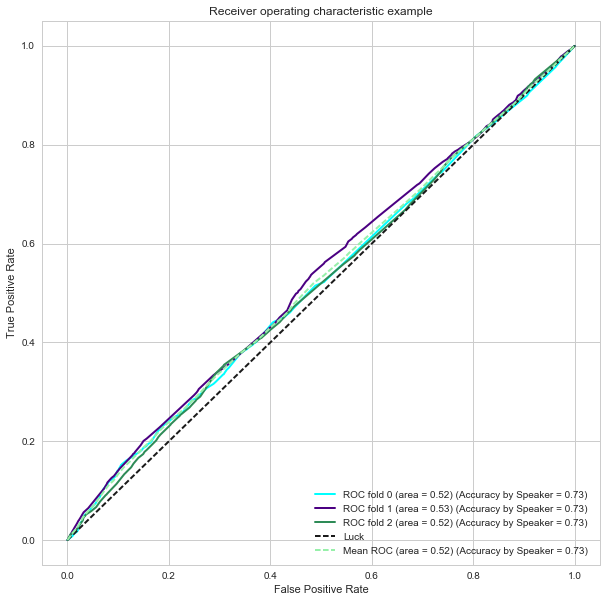

In [97]:
speaker_pred = dict.fromkeys(list(pd.Series(feature_V1.index).unique()))
for key in speaker_pred.keys():
    speaker_pred[key]=[]
    
X, y = feature_V1.drop(['Speaker','label','vowel','word','pre_seg','fol_seg'],axis=1), feature_V1['label']

cv = StratifiedKFold(n_splits=3)
classifier = tree.DecisionTreeClassifier(max_depth=8)#, min_samples_leaf=300)
#classifier =svm.SVC(kernel = 'rbf', probability=True)
#classifier = GradientBoostingClassifier(n_estimators=50)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
plt.figure(figsize = (10,10))
accuracy_all = []
for (train, test), color in zip(cv.split(speaker,label_speaker), colors):
    train_s = speaker[train]
    test_s = speaker[test]
    clf = classifier.fit(X.ix[train_s], y.ix[train_s])
    probas_,label = clf.predict_proba(X.ix[test_s]),clf.predict(X.ix[test_s])
    # Compute ROC curve and area the curve
    acc = []
    prediction_byspeaker = pd.DataFrame(y.ix[test_s] == label )
    prediction_byspeaker['Speaker'] = list(prediction_byspeaker .index.get_level_values('Speaker'))
    prediction_byspeaker = prediction_byspeaker.groupby(['Speaker','label'])['label'].count()
    for s in prediction_byspeaker.index.get_level_values('Speaker').unique():
        p = prediction_byspeaker.ix[s].idxmax()
        acc.append(p)
        speaker_pred[s].append(p)
    accuracy = sum(acc)/len(acc)
    accuracy_all.append(accuracy)
    fpr, tpr, thresholds = roc_curve(y.ix[test_s], probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(y.ix[test_s], 1-probas_[:, 1])
        roc_auc = auc(fpr, tpr)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f) (Accuracy by Speaker = %0.2f)' % (i, roc_auc, accuracy))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(speaker,label_speaker)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#speaker_pred = pd.DataFrame(speaker_pred).T
#speaker_pred.sum()[0]/len(speaker_pred)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f) (Accuracy by Speaker = %0.2f) ' % (mean_auc,sum(accuracy_all)/len(accuracy_all)), lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Word Selection
* 1 Frequency
* 2 Balance

In [11]:
word_freq = data.groupby(['word'])['word'].count()
word_freq.describe()

count     24209.000000
mean        129.395101
std        1501.856421
min           1.000000
25%           3.000000
50%           8.000000
75%          32.000000
max      151130.000000
Name: word, dtype: float64

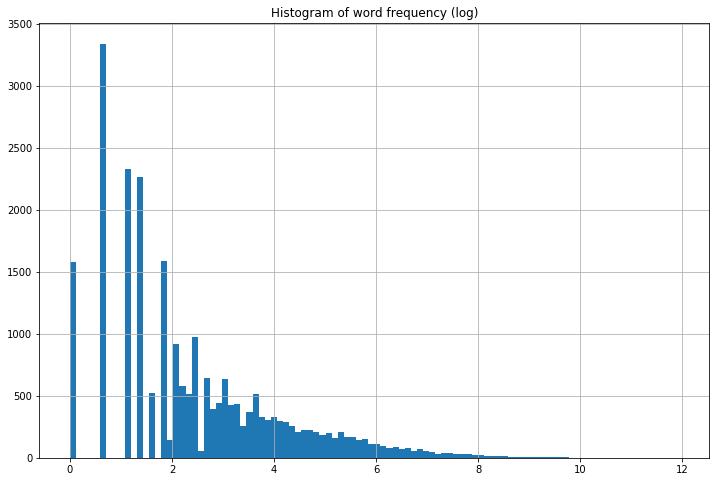

In [24]:
% matplotlib inline
np.log(word_freq).hist(bins=100,figsize=(12,8))
plt.title('Histogram of word frequency (log)')

In [27]:
word_freq[word_freq>2000].describe()

count       236.000000
mean       7218.436441
std       13348.329311
min        2002.000000
25%        2436.750000
50%        3401.000000
75%        6645.750000
max      151130.000000
Name: word, dtype: float64

In [30]:
word_selected = list(word_freq[word_freq>2000].index)

In [85]:
word_freq[word_freq>2000]['GOVERNMENT']

8183

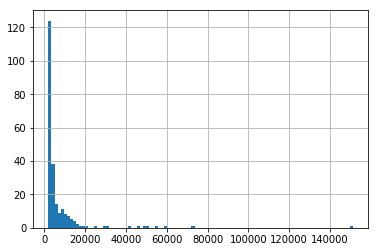

In [26]:
word_freq[word_freq>2000].hist(bins=100)

In [105]:
data[data.word == 'AMENDMENT']

,name,vowel,stress,pre_word,word,fol_word,F1,F2,F3,B1,...,F2@50%,F1@65%,F2@65%,F1@80%,F2@80%,nFormants,Speaker,Democratic,Republican,label
1512,MARKDOLSON,AH,0,FIRST,AMENDMENT,SP,437.8,1627.8,2460.9,190.2,...,1618.9,418.0,1604.0,418.0,1604.0,6,MARKDOLSON,12.0,3.0,1
1513,MARKDOLSON,EH,1,FIRST,AMENDMENT,SP,569.1,1702.9,2964.0,189.9,...,1687.1,593.5,1683.4,589.7,1651.1,5,MARKDOLSON,12.0,3.0,1
1514,MARKDOLSON,AH,0,FIRST,AMENDMENT,SP,599.9,1602.3,2819.4,137.2,...,1612.7,555.2,1627.3,555.2,1627.3,5,MARKDOLSON,12.0,3.0,1
4250,THEODOREBOLSON,AH,0,ELEVENTH,AMENDMENT,ISSUE,458.0,1676.4,2783.6,188.7,...,1624.9,374.2,1398.9,374.2,1398.9,5,THEODOREBOLSON,0.0,57.0,-1
4251,THEODOREBOLSON,EH,1,ELEVENTH,AMENDMENT,ISSUE,546.0,1492.4,2653.4,142.0,...,1496.2,543.7,1498.1,543.7,1498.1,6,THEODOREBOLSON,0.0,57.0,-1
4252,THEODOREBOLSON,AH,0,ELEVENTH,AMENDMENT,ISSUE,469.7,1364.1,2659.1,116.9,...,1365.4,426.2,1365.8,426.2,1365.8,6,THEODOREBOLSON,0.0,57.0,-1
4321,THEODOREBOLSON,AH,0,ELEVENTH,AMENDMENT,ISSUE,417.6,1372.1,2422.7,164.9,...,1319.0,386.5,1281.8,386.5,1281.8,5,THEODOREBOLSON,0.0,57.0,-1
4322,THEODOREBOLSON,EH,1,ELEVENTH,AMENDMENT,ISSUE,516.9,1463.1,1805.8,196.2,...,1476.4,529.2,1475.6,529.2,1475.6,6,THEODOREBOLSON,0.0,57.0,-1
4323,THEODOREBOLSON,AH,0,ELEVENTH,AMENDMENT,ISSUE,467.3,1502.8,1783.8,138.0,...,1508.7,442.7,1505.5,442.7,1505.5,6,THEODOREBOLSON,0.0,57.0,-1
4353,THEODOREBOLSON,AH,0,ELEVENTH,AMENDMENT,SP,429.3,1469.0,2503.6,231.2,...,1489.5,308.8,1544.6,307.7,1537.6,5,THEODOREBOLSON,0.0,57.0,-1


In [72]:
len(data[data.word == 'AMENDMENT'][data.vowel=='EH'])

/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


1184

In [118]:
E = list(EH) 
A = list(AH)
len(E)
len(A)
E == A*2

False

In [125]:
word_AMENDMENT = pd.DataFrame({'EH':EH,'AH':AH})

In [128]:
word_AMENDMENT[word_AMENDMENT['AH'] != 2*word_AMENDMENT['EH']]

AH  EH
Speaker          pre_word fol_word        
ALANGURA         SP       OR         1   1
DAVIDCFREDERICK  SP       SP         5   2
JEFFREYALAMKEN   SP       SP         3   2
KANNONKSHANMUGAM FOURTH   PURPOSES   5   2
                 SP       SP         1   1

In [120]:
EH.index = EH.index.droplevel(level = 'vowel')
AH.index = AH.index.droplevel(level = 'vowel')

In [109]:
EH = data[data.word == 'AMENDMENT'][data.vowel == 'EH'].groupby(['Speaker','vowel','pre_word','fol_word'])['word'].count()

/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [110]:
AH = data[data.word == 'AMENDMENT'][data.vowel == 'AH'].groupby(['Speaker','vowel','pre_word','fol_word'])['word'].count()

/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [68]:
data[data.word == 'AMENDMENT'][['Speaker','word','vowel','plt_vclass',
       'plt_manner', 'plt_place', 'plt_voice', 'plt_preseg', 'plt_folseq',
       'style', 'glide', 'pre_seg', 'fol_seg', 'context', 'vowel_index',
       'pre_word_trans', 'word_trans', 'fol_word_trans']]

,Speaker,word,vowel,plt_vclass,plt_manner,plt_place,plt_voice,plt_preseg,plt_folseq,style,glide,pre_seg,fol_seg,context,vowel_index,pre_word_trans,word_trans,fol_word_trans
1512,MARKDOLSON,AMENDMENT,AH,@,nasal,labial,voiced,NaN,two_fol_syl,NaN,NaN,T,M,initial,1,F ER1 S T,AH0 M EH1 N D M AH0 N T,SP
1513,MARKDOLSON,AMENDMENT,EH,e,nasal,apical,voiced,nasal_labial,complex_one_syl,NaN,NaN,M,N,internal,3,F ER1 S T,AH0 M EH1 N D M AH0 N T,SP
1514,MARKDOLSON,AMENDMENT,AH,@,nasal,apical,voiced,nasal_labial,complex_coda,NaN,NaN,M,N,internal,7,F ER1 S T,AH0 M EH1 N D M AH0 N T,SP
4250,THEODOREBOLSON,AMENDMENT,AH,@,nasal,labial,voiced,NaN,two_fol_syl,NaN,NaN,TH,M,initial,1,AH0 L EH1 V AH0 N TH,AH0 M EH1 N D M AH0 N T,IH1 SH UW0
4251,THEODOREBOLSON,AMENDMENT,EH,e,nasal,apical,voiced,nasal_labial,complex_one_syl,NaN,NaN,M,N,internal,3,AH0 L EH1 V AH0 N TH,AH0 M EH1 N D M AH0 N T,IH1 SH UW0
4252,THEODOREBOLSON,AMENDMENT,AH,@,nasal,apical,voiced,nasal_labial,complex_coda,NaN,NaN,M,N,internal,7,AH0 L EH1 V AH0 N TH,AH0 M EH1 N D M AH0 N T,IH1 SH UW0
4321,THEODOREBOLSON,AMENDMENT,AH,@,nasal,labial,voiced,NaN,two_fol_syl,NaN,NaN,TH,M,initial,1,AH0 L EH1 V AH0 N TH,AH0 M EH1 N D M AH0 N T,IH1 SH UW0
4322,THEODOREBOLSON,AMENDMENT,EH,e,nasal,apical,voiced,nasal_labial,complex_one_syl,NaN,NaN,M,N,internal,3,AH0 L EH1 V AH0 N TH,AH0 M EH1 N D M AH0 N T,IH1 SH UW0
4323,THEODOREBOLSON,AMENDMENT,AH,@,nasal,apical,voiced,nasal_labial,complex_coda,NaN,NaN,M,N,internal,7,AH0 L EH1 V AH0 N TH,AH0 M EH1 N D M AH0 N T,IH1 SH UW0
4353,THEODOREBOLSON,AMENDMENT,AH,@,nasal,labial,voiced,NaN,two_fol_syl,NaN,NaN,TH,M,initial,1,AH0 L EH1 V AH0 N TH,AH0 M EH1 N D M AH0 N T,SP


In [31]:
def word_selection(frequency_cut, word_freq_df):
    return list(word_freq_df[word_freq_df>frequency_cut].index)

In [ ]:
def word_dataset_generation(word_selected, data_ori):
    

# Word Model - Embedding

In [72]:
data_featureV1 = data[['Speaker','word','label','vowel', 'stress', 'dur','pre_seg','fol_seg',
                          'F1', 'F2','F3', 'B1', 'B2', 'B3','F1@20%', 'F2@20%','F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%','F2@80%','nFormants']]
# test vowel by word model 
feature_V1 = data_featureV1[data_featureV1['word'] == 'AMENDMENT']
from sklearn import preprocessing
vowel_encoder = preprocessing.LabelEncoder()
vowel_encoder.fit(feature_V1.vowel)
feature_V1['vowel_num'] = vowel_encoder.transform(feature_V1.vowel) 

word_encoder = preprocessing.LabelEncoder()
word_encoder.fit(feature_V1.word)
feature_V1['word_num'] = word_encoder.transform(feature_V1.word) 


pre_seg_encoder = preprocessing.LabelEncoder()
pre_seg_encoder.fit(feature_V1.pre_seg)
feature_V1['pre_seg_num'] = pre_seg_encoder.transform(feature_V1.pre_seg) 

fol_seg_encoder = preprocessing.LabelEncoder()
fol_seg_encoder.fit(feature_V1.fol_seg)
feature_V1['fol_seg_num'] = fol_seg_encoder.transform(feature_V1.fol_seg)

feature_V1.index = feature_V1['Speaker']
label_speaker = feature_V1.groupby(['Speaker'])['label'].mean()
speaker = np.array(list(label_speaker.index))
feature_V1 = feature_V1.dropna()



/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

In [81]:

label_speaker = feature_V1.groupby(['Speaker'])['label'].mean()
speaker = np.array(list(label_speaker.index))


## Base model Decision Tree

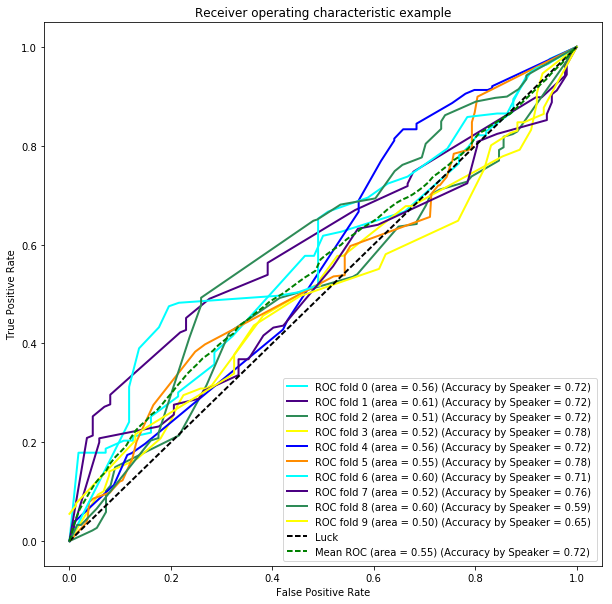

In [107]:
# Decision Tree
% matplotlib inline
speaker_pred = dict.fromkeys(list(pd.Series(y.index).unique()))
for key in speaker_pred.keys():
    speaker_pred[key]=[]
    
X, y = feature_V1.drop(['Speaker','label','vowel','word','pre_seg','fol_seg'],axis=1), feature_V1['label']

cv = StratifiedKFold(n_splits=10)
classifier = tree.DecisionTreeClassifier(max_depth=8)#, min_samples_leaf=300)
#classifier =svm.SVC(kernel = 'rbf', probability=True)
#classifier = GradientBoostingClassifier(n_estimators=50)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
plt.figure(figsize = (10,10))
accuracy_all = []
for (train, test), color in zip(cv.split(speaker,label_speaker), colors):
    train_s = speaker[train]
    test_s = speaker[test]
    clf = classifier.fit(X.ix[train_s], y.ix[train_s])
    probas_,label = clf.predict_proba(X.ix[test_s]),clf.predict(X.ix[test_s])
    # Compute ROC curve and area the curve
    acc = []
    prediction_byspeaker = pd.DataFrame(y.ix[test_s] == label )
    prediction_byspeaker['Speaker'] = list(prediction_byspeaker .index.get_level_values('Speaker'))
    prediction_byspeaker = prediction_byspeaker.groupby(['Speaker','label'])['label'].count()
    for s in prediction_byspeaker.index.get_level_values('Speaker').unique():
        p = prediction_byspeaker.ix[s].idxmax()
        acc.append(p)
        speaker_pred[s].append(p)
    accuracy = sum(acc)/len(acc)
    accuracy_all.append(accuracy)
    fpr, tpr, thresholds = roc_curve(y.ix[test_s], probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(y.ix[test_s], 1-probas_[:, 1])
        roc_auc = auc(fpr, tpr)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f) (Accuracy by Speaker = %0.2f)' % (i, roc_auc, accuracy))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(speaker,label_speaker)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#speaker_pred = pd.DataFrame(speaker_pred).T
#speaker_pred.sum()[0]/len(speaker_pred)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f) (Accuracy by Speaker = %0.2f) ' % (mean_auc,sum(accuracy_all)/len(accuracy_all)), lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Base model Logistic Regression

## Base model SVM with RBF kernel